In [1]:
from pandas import read_csv
import numpy as np

In [2]:
df=read_csv('international-airline-passengers.csv',usecols=[1])

In [3]:
df.describe()

,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [4]:
values=df.values.astype('float32')
values.shape

(144, 1)

In [5]:
train_size=int(values.shape[0]*0.67)
test_size=values.shape[0]-train_size
train=values[0:train_size]
test=values[train_size:]


In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
train=scaler.fit_transform(train)
test=scaler.transform(test)

In [7]:
def create_dataset(data,k):
    dataX,dataY=[],[]
    for i in range(data.shape[0]-k):
        x=data[i:i+k,0]
        y=data[i+k,0]
        dataX.append(x)
        dataY.append(y)
    return np.array(dataX),np.array(dataY)

In [8]:
create_dataset(test,12)

(array([[0.682848  , 0.63754046, 0.815534  , 0.7896441 , 0.8122978 ,
         1.0291263 , 1.1682849 , 1.1747574 , 0.97087383, 0.7864078 ,
         0.6504855 , 0.7508091 ],
        [0.63754046, 0.815534  , 0.7896441 , 0.8122978 , 1.0291263 ,
         1.1682849 , 1.1747574 , 0.97087383, 0.7864078 , 0.6504855 ,
         0.7508091 , 0.7637541 ],
        [0.815534  , 0.7896441 , 0.8122978 , 1.0291263 , 1.1682849 ,
         1.1747574 , 0.97087383, 0.7864078 , 0.6504855 , 0.7508091 ,
         0.7637541 , 0.69255674],
        [0.7896441 , 0.8122978 , 1.0291263 , 1.1682849 , 1.1747574 ,
         0.97087383, 0.7864078 , 0.6504855 , 0.7508091 , 0.7637541 ,
         0.69255674, 0.8349515 ],
        [0.8122978 , 1.0291263 , 1.1682849 , 1.1747574 , 0.97087383,
         0.7864078 , 0.6504855 , 0.7508091 , 0.7637541 , 0.69255674,
         0.8349515 , 0.7896441 ],
        [1.0291263 , 1.1682849 , 1.1747574 , 0.97087383, 0.7864078 ,
         0.6504855 , 0.7508091 , 0.7637541 , 0.69255674, 0.8349515 ,
  

In [9]:
look_back=12
trainX,trainY=create_dataset(train,look_back)
testX,testY=create_dataset(test,look_back)

In [10]:
trainX=np.reshape(trainX,(trainX.shape[0],trainX.shape[1],1))
testX=np.reshape(testX,(testX.shape[0],testX.shape[1],1))
trainX.shape

(84, 12, 1)

In [11]:
from keras.models import Sequential
from keras.layers import SimpleRNN,Dense

In [26]:
model=Sequential()
model.add(SimpleRNN(4,input_shape=(look_back,1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(trainX,trainY,epochs=50,batch_size=1)#reducing loss by back propagation using time

Epoch 1/50
84/84 [==============================] - 1s 2ms/step - loss: 0.0265
Epoch 2/50
84/84 [==============================] - 0s 2ms/step - loss: 0.0228
Epoch 3/50
84/84 [==============================] - 0s 2ms/step - loss: 0.0184
Epoch 4/50
84/84 [==============================] - 0s 2ms/step - loss: 0.0178
Epoch 5/50
84/84 [==============================] - 0s 2ms/step - loss: 0.0159
Epoch 6/50
84/84 [==============================] - 0s 1ms/step - loss: 0.0150
Epoch 7/50
84/84 [==============================] - 0s 1ms/step - loss: 0.0153
Epoch 8/50
84/84 [==============================] - 0s 2ms/step - loss: 0.0142
Epoch 9/50
84/84 [==============================] - 0s 2ms/step - loss: 0.0132
Epoch 10/50
84/84 [==============================] - 0s 2ms/step - loss: 0.0126
Epoch 11/50
84/84 [==============================] - 0s 2ms/step - loss: 0.0130
Epoch 12/50
84/84 [==============================] - 0s 2ms/step - loss: 0.0125
Epoch 13/50
84/84 [==============================

In [28]:
testPredict=model.predict(testX)
testPredict=scaler.inverse_transform(testPredict).ravel()#ravel to make it one dimensional

trainPredict=model.predict(trainX)
trainPredict=scaler.inverse_transform(trainPredict).ravel()

testTrue=scaler.inverse_transform([testY]).ravel()
trainTrue=scaler.inverse_transform([trainY]).ravel()

testPredict.shape,testTrue.shape,trainPredict.shape,trainTrue.shape

3/3 [==============================] - 0s 2ms/step


((36,), (36,), (84,), (84,))

In [15]:
from matplotlib import pyplot as plt


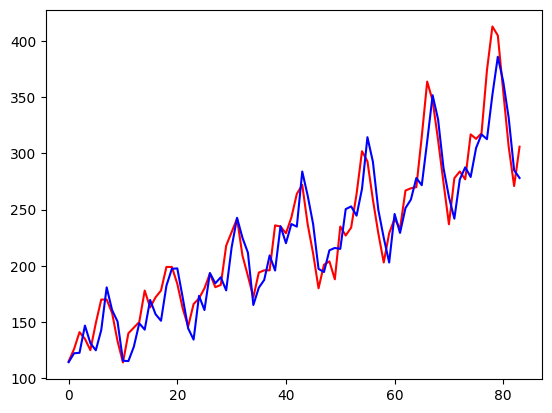

In [29]:
plt.plot(trainTrue,c='r')
plt.plot(trainPredict,c='b')
plt.show()

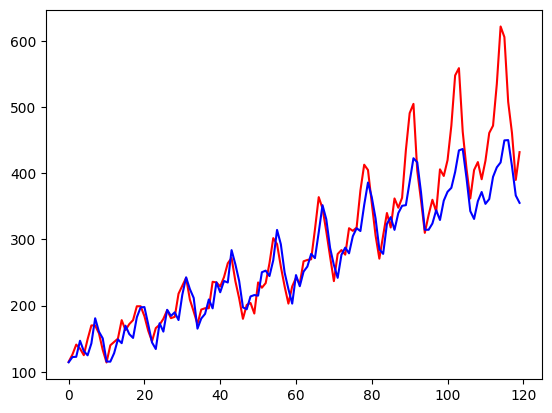

In [30]:
combinedPredicted=np.concatenate((trainPredict,testPredict))
combinedTrue=np.concatenate((trainTrue,testTrue))
plt.plot(combinedTrue,c='r')
plt.plot(combinedPredicted,c='b')
                                 